<a href="https://colab.research.google.com/github/satro1/ML_Projects/blob/main/03_DecisionTree/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Download dataset from Kaggle

In [1]:
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USER"] = userdata.get('KAGGLE_USER')

!kaggle datasets download -d pablomgomez21/drugs-a-b-c-x-y-for-decision-trees
! unzip "drugs-a-b-c-x-y-for-decision-trees.zip"

Dataset URL: https://www.kaggle.com/datasets/pablomgomez21/drugs-a-b-c-x-y-for-decision-trees
License(s): unknown
drugs-a-b-c-x-y-for-decision-trees.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  drugs-a-b-c-x-y-for-decision-trees.zip
replace drug200.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: drug200.csv             


## Read the dataset

In [2]:
import pandas as pd

df = pd.read_csv('drug200.csv')

print("Num records:", len(df))
df.head()

Num records: 200


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


## Visualize the dataset

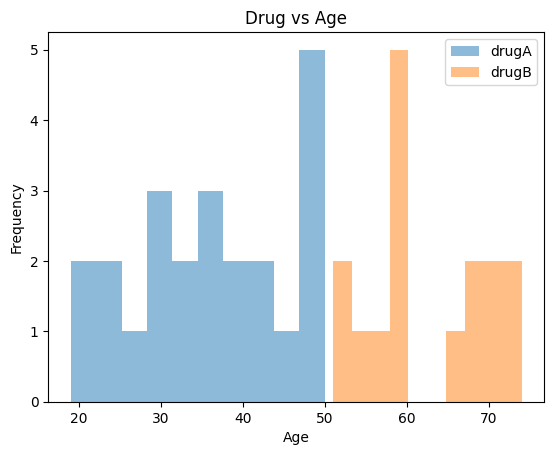

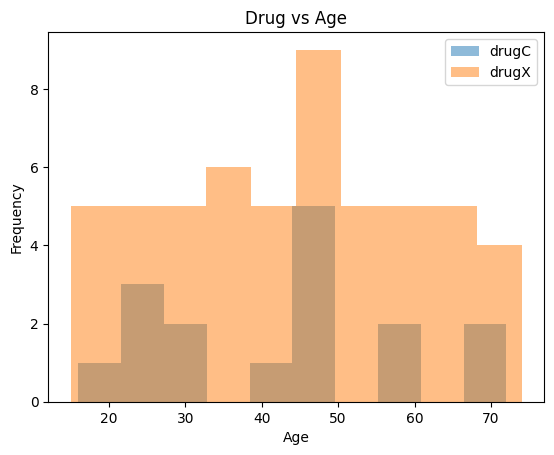

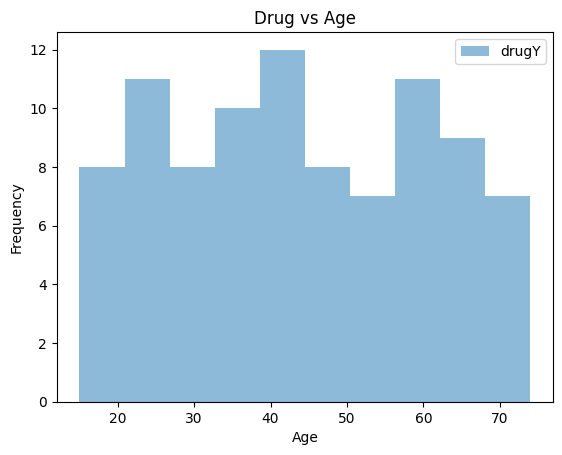

<ipython-input-3-20539ba517ed>:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp.append(len(df[df[x] == bins[i]][df[y] == labels[j]]))
<ipython-input-3-20539ba517ed>:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp.append(len(df[df[x] == bins[i]][df[y] == labels[j]]))
<ipython-input-3-20539ba517ed>:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp.append(len(df[df[x] == bins[i]][df[y] == labels[j]]))
<ipython-input-3-20539ba517ed>:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp.append(len(df[df[x] == bins[i]][df[y] == labels[j]]))
<ipython-input-3-20539ba517ed>:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp.append(len(df[df[x] == bins[i]][df[y] == labels[j]]))
<ipython-input-3-20539ba517ed>:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp.append(len(df[df[x] ==

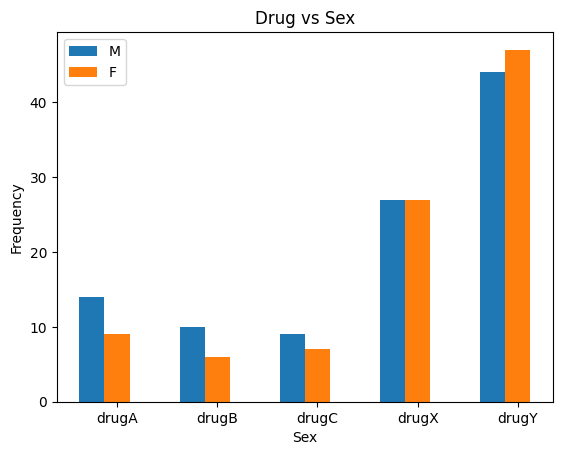

<ipython-input-3-20539ba517ed>:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp.append(len(df[df[x] == bins[i]][df[y] == labels[j]]))
<ipython-input-3-20539ba517ed>:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp.append(len(df[df[x] == bins[i]][df[y] == labels[j]]))
<ipython-input-3-20539ba517ed>:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp.append(len(df[df[x] == bins[i]][df[y] == labels[j]]))
<ipython-input-3-20539ba517ed>:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp.append(len(df[df[x] == bins[i]][df[y] == labels[j]]))
<ipython-input-3-20539ba517ed>:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp.append(len(df[df[x] == bins[i]][df[y] == labels[j]]))
<ipython-input-3-20539ba517ed>:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp.append(len(df[df[x] ==

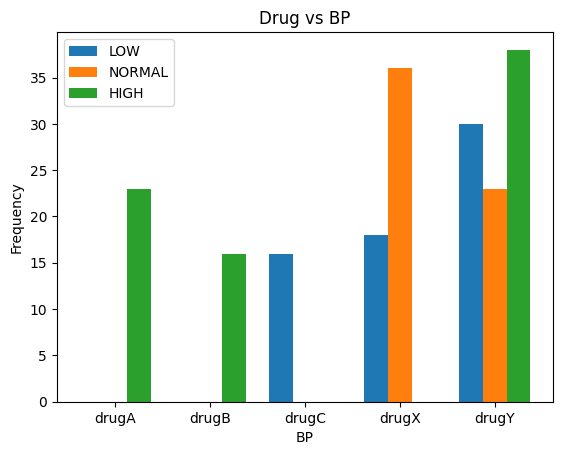

<ipython-input-3-20539ba517ed>:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp.append(len(df[df[x] == bins[i]][df[y] == labels[j]]))
<ipython-input-3-20539ba517ed>:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp.append(len(df[df[x] == bins[i]][df[y] == labels[j]]))
<ipython-input-3-20539ba517ed>:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp.append(len(df[df[x] == bins[i]][df[y] == labels[j]]))
<ipython-input-3-20539ba517ed>:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp.append(len(df[df[x] == bins[i]][df[y] == labels[j]]))
<ipython-input-3-20539ba517ed>:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp.append(len(df[df[x] == bins[i]][df[y] == labels[j]]))
<ipython-input-3-20539ba517ed>:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp.append(len(df[df[x] ==

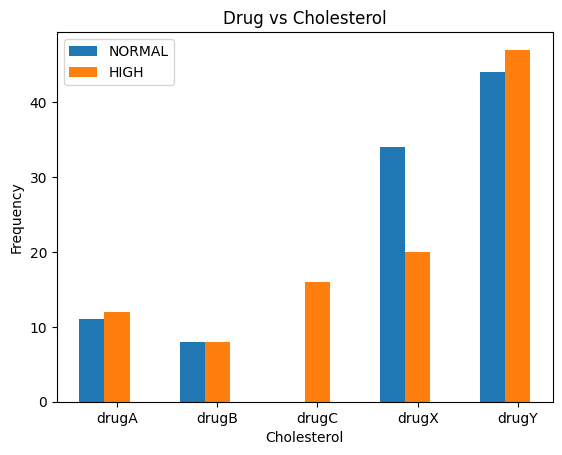

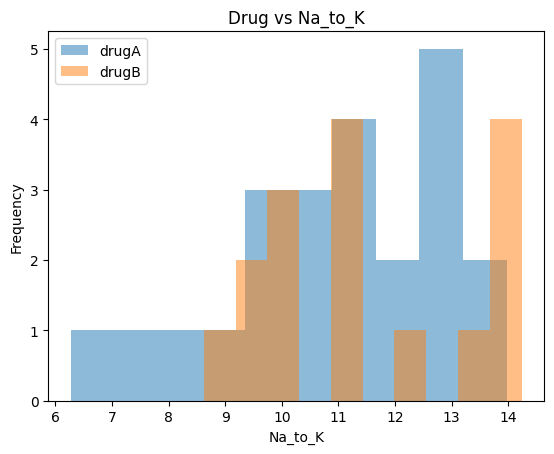

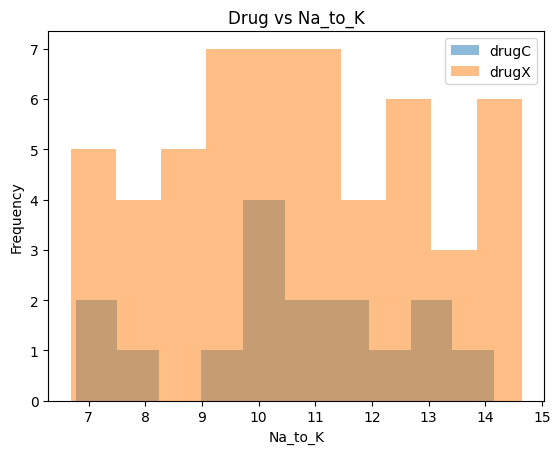

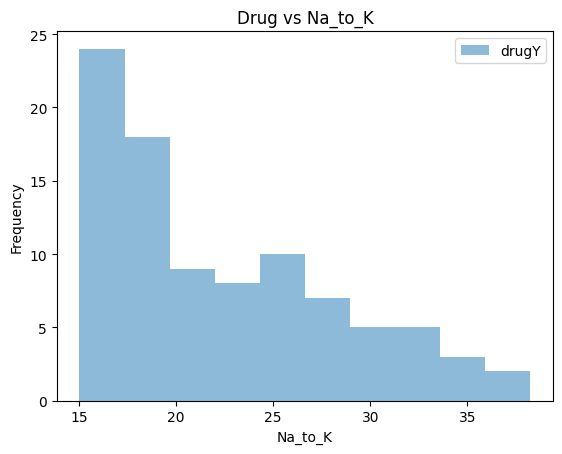

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def plot_histograms(title, df, x, y, bins):
    plt.figure()
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel("Frequency")
    for i in range(len(bins)):
      plt.hist(df[df[y] == bins[i]][x], alpha=0.5)
    plt.legend(bins)
    plt.show()

def plot_bar_chart(title, df, x, y, bins, labels):
  plt.figure()
  plt.title(title)
  plt.xlabel(x)
  plt.ylabel("Frequency")
  barWidth = 0.25

  br = np.arange(len(labels))
  for i in range(len(bins)):
    temp = []
    for j in range(len(labels)):
      temp.append(len(df[df[x] == bins[i]][df[y] == labels[j]]))
    plt.bar(br, temp, width=barWidth)
    br = [x + barWidth for x in br]
  plt.xticks([r + barWidth for r in range(len(labels))], labels)
  plt.legend(bins)
  plt.show()


plot_histograms("Drug vs Age", df, 'Age', 'Drug', ['drugA', 'drugB'])
plot_histograms("Drug vs Age", df, 'Age', 'Drug', ['drugC', 'drugX'])
plot_histograms("Drug vs Age", df, 'Age', 'Drug', ['drugY'])

plot_bar_chart("Drug vs Sex", df, 'Sex', 'Drug', ['M', 'F'], ['drugA', 'drugB', 'drugC', 'drugX', 'drugY'])

plot_bar_chart("Drug vs BP", df, 'BP', 'Drug', ['LOW', 'NORMAL', 'HIGH'], ['drugA', 'drugB', 'drugC', 'drugX', 'drugY'])

plot_bar_chart("Drug vs Cholesterol", df, 'Cholesterol', 'Drug', ['NORMAL', 'HIGH'], ['drugA', 'drugB', 'drugC', 'drugX', 'drugY'])

plot_histograms("Drug vs Na_to_K", df, 'Na_to_K', 'Drug', ['drugA', 'drugB'])
plot_histograms("Drug vs Na_to_K", df, 'Na_to_K', 'Drug', ['drugC', 'drugX'])
plot_histograms("Drug vs Na_to_K", df, 'Na_to_K', 'Drug', ['drugY'])


## Prepare the data

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split

features = ['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']
sex = {'F': 0, 'M': 1}
bp = {'LOW': 0, 'NORMAL': 1, 'HIGH': 2}
cholesterol = {'NORMAL': 0, 'HIGH': 1}

df['Sex'] = df['Sex'].map(sex)
df['BP'] = df['BP'].map(bp)
df['Cholesterol'] = df['Cholesterol'].map(cholesterol)

X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]
Y = df['Drug']
print("X shape", X.shape)
print("Y shape", Y.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.75, random_state=42)
print("X_train shape", X_train.shape)
print("Y_train shape", Y_train.shape)
print("X_test shape", X_test.shape)
print("Y_test shape", Y_test.shape)
print("m =", X_train.shape[1])
print("n =", X_train.shape[0])

X shape (200, 5)
Y shape (200,)
X_train shape (50, 5)
Y_train shape (50,)
X_test shape (150, 5)
Y_test shape (150,)
m = 5
n = 50


## Model this relationship using a Decision Tree


[Text(0.6666666666666666, 0.9, 'Na_to_K <= 14.693\ngini = 0.617\nsamples = 50\nvalue = [2.0, 2.0, 5.0, 14.0, 27.0]'),
 Text(0.5555555555555556, 0.7, 'BP <= 1.5\ngini = 0.567\nsamples = 23\nvalue = [2, 2, 5, 14, 0]'),
 Text(0.6111111111111112, 0.8, 'True  '),
 Text(0.3333333333333333, 0.5, 'BP <= 0.5\ngini = 0.388\nsamples = 19\nvalue = [0, 0, 5, 14, 0]'),
 Text(0.2222222222222222, 0.3, 'Cholesterol <= 0.5\ngini = 0.494\nsamples = 9\nvalue = [0, 0, 5, 4, 0]'),
 Text(0.1111111111111111, 0.1, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 0, 4, 0]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 5, 0, 0]'),
 Text(0.4444444444444444, 0.3, 'gini = 0.0\nsamples = 10\nvalue = [0, 0, 0, 10, 0]'),
 Text(0.7777777777777778, 0.5, 'Age <= 58.0\ngini = 0.5\nsamples = 4\nvalue = [2, 2, 0, 0, 0]'),
 Text(0.6666666666666666, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0, 0, 0]'),
 Text(0.8888888888888888, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0, 0, 0]'),
 Text(0.777777777

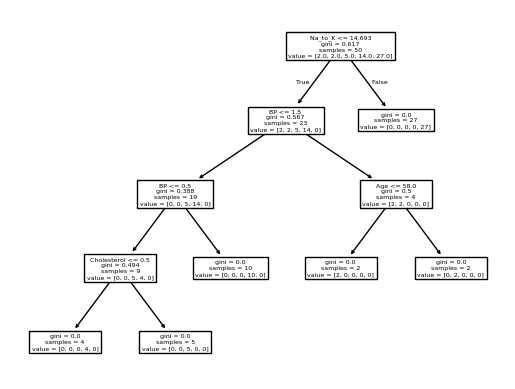

In [5]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, Y_train)
tree.plot_tree(dtree, feature_names=features)



# Test the model

In [6]:
Y_pred = dtree.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print((Y_test != Y_pred).astype(int).sum())

Accuracy: 0.9666666666666667
5


# Visualize Error

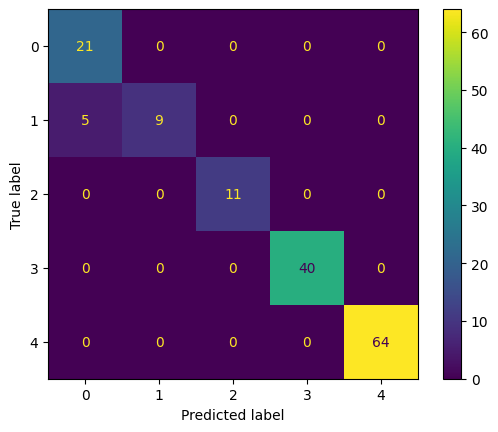

In [7]:
cm = confusion_matrix(Y_test, Y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

